# **Predicting Employee Attrition using Logistic Regression** 

In [1]:
# Importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/santhoshreddyn86/Datasets/main/employee.csv")
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.shape

(1470, 35)

In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
# Removing unwanted columns: Consist of Constant values

df[["EmployeeCount","Over18","StandardHours","EmployeeNumber"]]

,EmployeeCount,Over18,StandardHours,EmployeeNumber
0,1,Y,80,1
1,1,Y,80,2
2,1,Y,80,4
3,1,Y,80,5
4,1,Y,80,7
...,...,...,...,...
1465,1,Y,80,2061
1466,1,Y,80,2062
1467,1,Y,80,2064
1468,1,Y,80,2065


In [6]:
# Droping Columns

df = df.drop(["EmployeeCount","Over18","StandardHours","EmployeeNumber"],axis=1)

In [7]:
# Converting the Attrition, Overtime and Gender columns into binary integers

df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)  # 1=Yes, 0=No
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)    # 1=Yes, 0=No
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)       # 1=Male, 0=Female

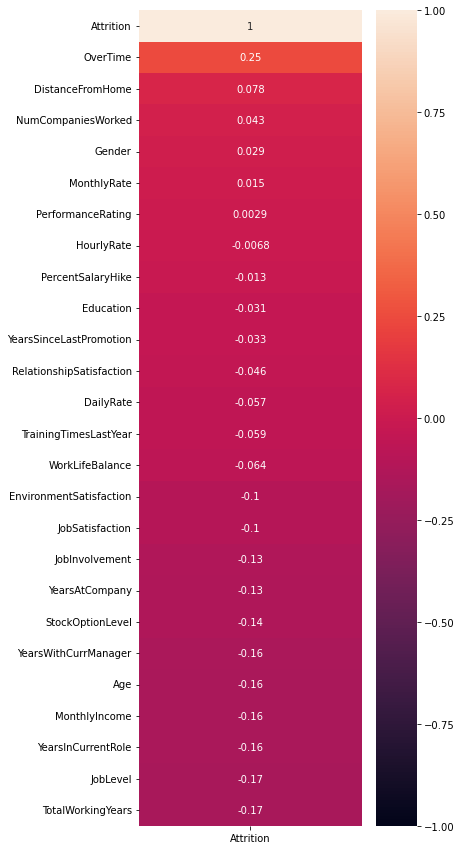

In [8]:
# Heatmap for correlation between target & independent columns in descending order.

plt.figure(figsize=(5,15))

corr_matrix = df.corr()
data=pd.DataFrame(corr_matrix["Attrition"].sort_values(ascending=False))
ax = sns.heatmap(data, annot=True, vmin=-1, vmax=1)
ax.tick_params(labelrotation=0)

In [9]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,...,4,4,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,...,3,2,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,...,3,4,1,6,3,3,2,2,2,2


<AxesSubplot:>

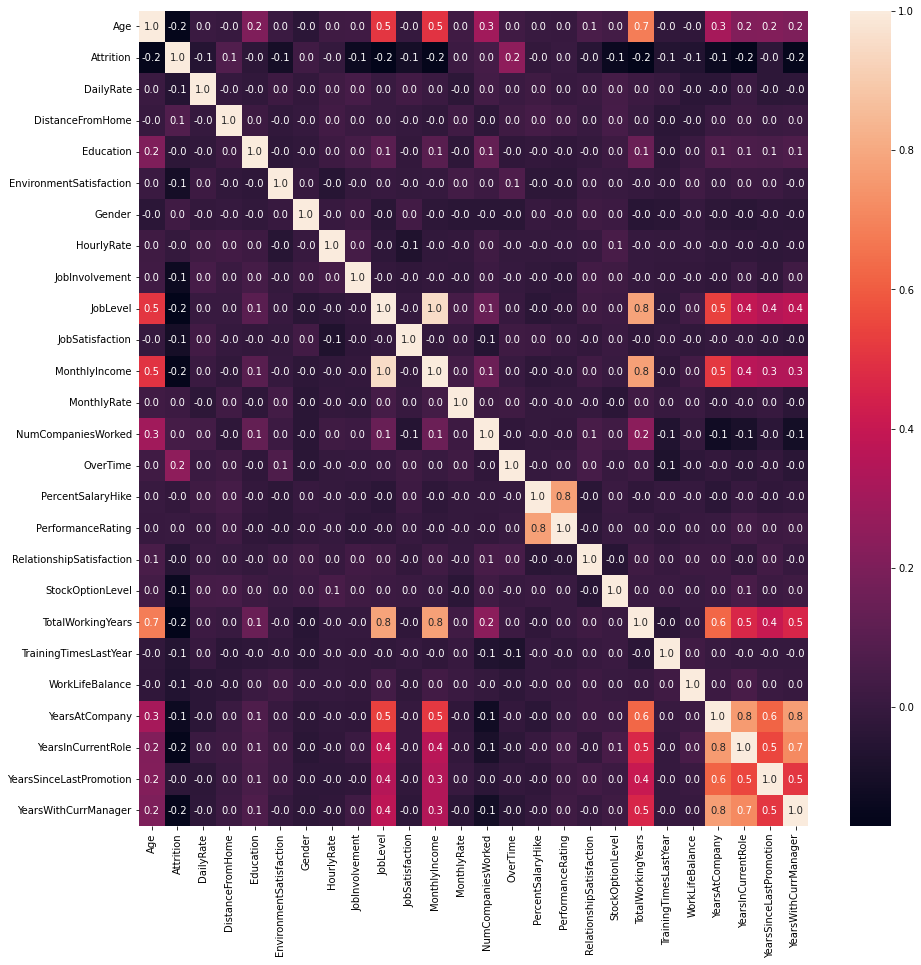

In [10]:
# Identifing highely correlated features.

plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True,fmt="0.01f")

In [11]:
# Removing highly correlated features.

df = df.drop(['JobLevel','YearsInCurrentRole','YearsWithCurrManager','PerformanceRating','MonthlyRate','TotalWorkingYears'],axis=1)

<AxesSubplot:>

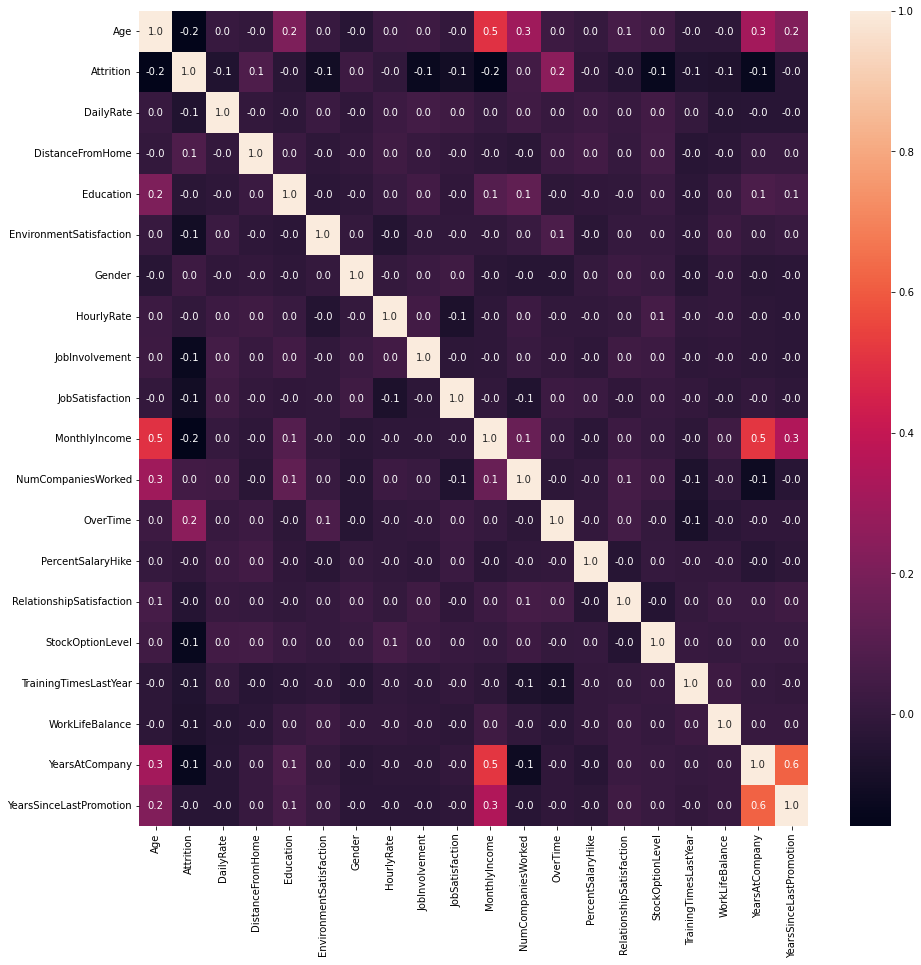

In [12]:
# Visualizing Heatmap after droping features. 

plt.figure(figsize=(15,15))

sns.heatmap(df.corr(),annot=True,fmt="0.01f")

In [13]:
df.shape

(1470, 25)

In [14]:
# Malualy identifing and removing unimportant features.

df = df.drop(['Education','HourlyRate','StockOptionLevel','TrainingTimesLastYear','YearsAtCompany','JobInvolvement',
              'NumCompaniesWorked','EnvironmentSatisfaction','JobSatisfaction','RelationshipSatisfaction',
              'WorkLifeBalance','YearsSinceLastPromotion','DailyRate'],axis=1)

In [15]:
df.shape

(1470, 12)

In [16]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike
0,41,1,Travel_Rarely,Sales,1,Life Sciences,0,Sales Executive,Single,5993,1,11
1,49,0,Travel_Frequently,Research & Development,8,Life Sciences,1,Research Scientist,Married,5130,0,23
2,37,1,Travel_Rarely,Research & Development,2,Other,1,Laboratory Technician,Single,2090,1,15
3,33,0,Travel_Frequently,Research & Development,3,Life Sciences,0,Research Scientist,Married,2909,1,11
4,27,0,Travel_Rarely,Research & Development,2,Medical,1,Laboratory Technician,Married,3468,0,12


In [17]:
# Checking for null values

df.isnull().sum()

Age                  0
Attrition            0
BusinessTravel       0
Department           0
DistanceFromHome     0
EducationField       0
Gender               0
JobRole              0
MaritalStatus        0
MonthlyIncome        0
OverTime             0
PercentSalaryHike    0
dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                1470 non-null   int64 
 1   Attrition          1470 non-null   int64 
 2   BusinessTravel     1470 non-null   object
 3   Department         1470 non-null   object
 4   DistanceFromHome   1470 non-null   int64 
 5   EducationField     1470 non-null   object
 6   Gender             1470 non-null   int64 
 7   JobRole            1470 non-null   object
 8   MaritalStatus      1470 non-null   object
 9   MonthlyIncome      1470 non-null   int64 
 10  OverTime           1470 non-null   int64 
 11  PercentSalaryHike  1470 non-null   int64 
dtypes: int64(7), object(5)
memory usage: 137.9+ KB


## EDA

### Attrition

Target Variable

0    1233
1     237
Name: Attrition, dtype: int64


C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


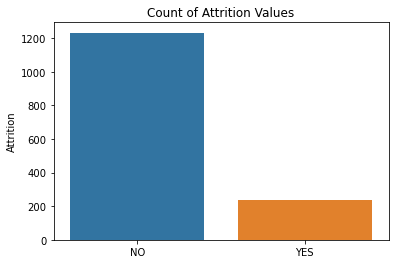

In [19]:
y = df['Attrition'].value_counts()
x = ['NO','YES']

sns.barplot(x,y)
plt.title("Count of Attrition Values")

print(df['Attrition'].value_counts())

Here, form the graph Majority of Attrition are NO, it is Highly imbalanced data value Distibution.

###  Age

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Age column values Distribution')

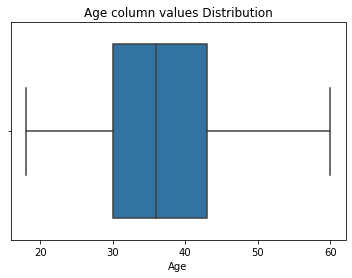

In [20]:
sns.boxplot(df['Age'])
plt.title("Age column values Distribution")

In [21]:
df.Age.describe()

count    1470.000000
mean       36.923810
std         9.135373
min        18.000000
25%        30.000000
50%        36.000000
75%        43.000000
max        60.000000
Name: Age, dtype: float64

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Age vs Attrition')

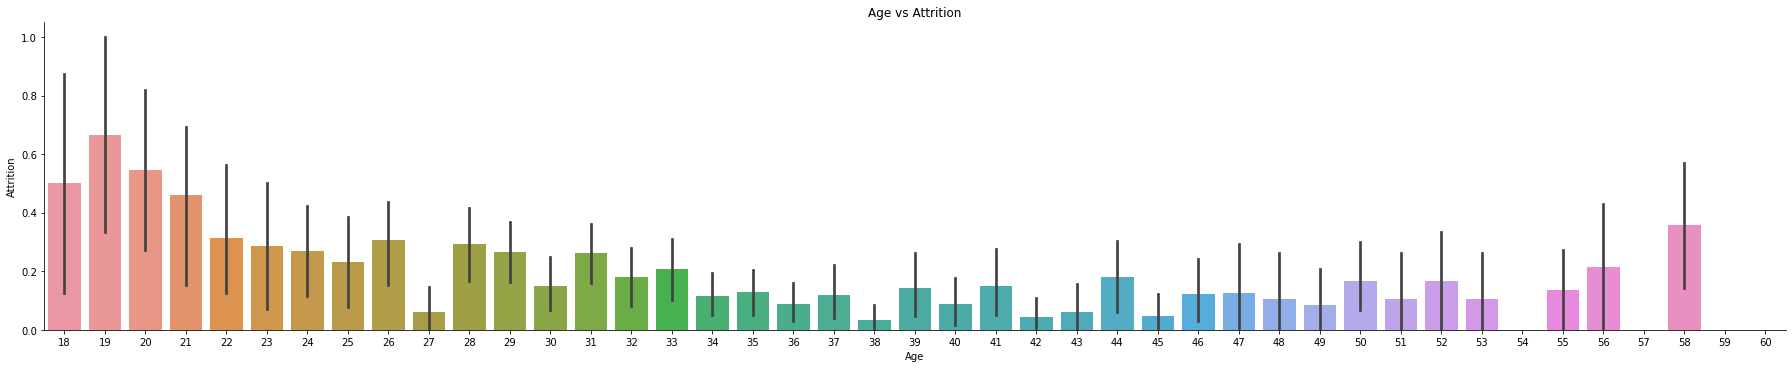

In [22]:
sns.factorplot(x = 'Age', y = 'Attrition', aspect = 5,kind = 'bar',data = df)
plt.title("Age vs Attrition")

Employees with Age group less than 30 are having high chances of leaving Organization.

In [23]:
# Creating bins for age column

def Binning_fun(age):
    if age >= 18 and age < 30:
        return "18-30"
    elif age >= 30 and age < 40:
        return "30-40"
    elif age >= 40 and age <50:
        return "40-50"
    else:
        return "50-60"

age_bin = df['Age'].apply(Binning_fun)

Text(0.5, 1.0, 'Age bins vs Attrition')

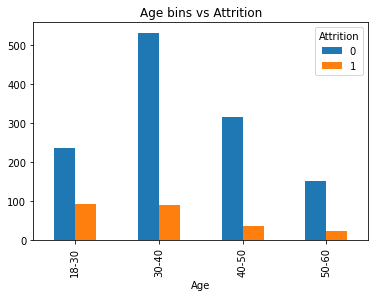

In [24]:
pd.crosstab(age_bin,df['Attrition']).plot(kind="bar")
plt.title("Age bins vs Attrition")

Age < 30 are more possible Attrition

### Business Travel

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Business travel Values')

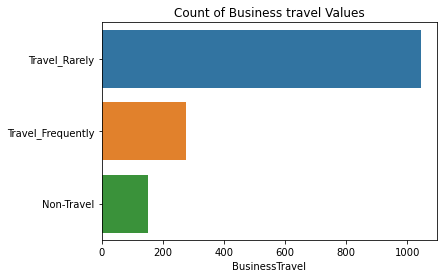

In [25]:
x = df['BusinessTravel'].value_counts()
y = df['BusinessTravel'].unique()

sns.barplot(x,y)
plt.title("Count of Business travel Values")

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Business Travel vs Attrition')

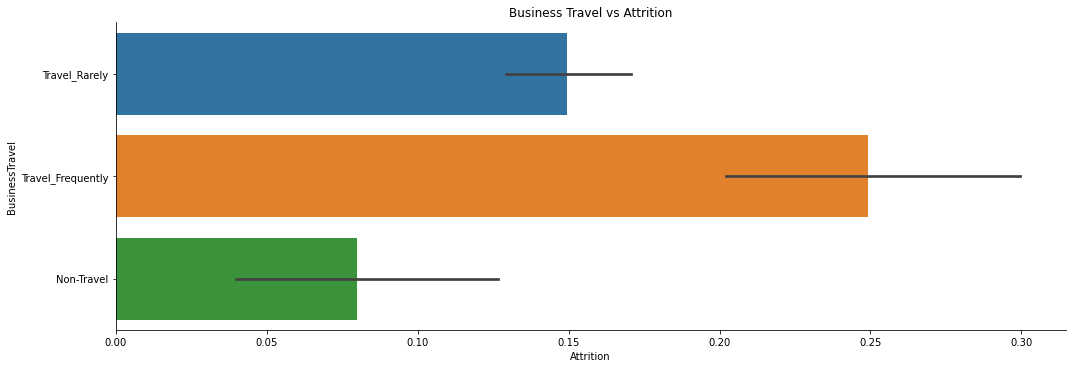

In [26]:
sns.factorplot(y = 'BusinessTravel', x = 'Attrition', aspect = 3,kind = 'bar',data = df)
plt.title("Business Travel vs Attrition")

Employees who are Travelling Frequently are having high Attrition.

### Gender

Text(0.5, 1.0, 'Count of Diffirent Gender')

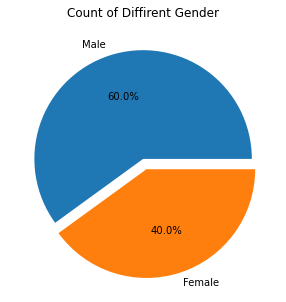

In [27]:
x = df['Gender'].value_counts()

plt.figure(figsize=(5,5))
plt.pie(data=df, x=x, labels=['Male','Female'], explode =(0,0.1),autopct='%1.1f%%')
plt.title("Count of Diffirent Gender")

Here, from the chart, it’s visible that the count of males is more than Female.

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Gender vs Attrition')

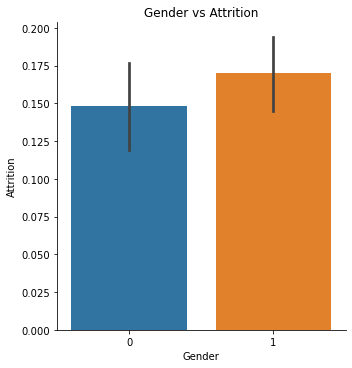

In [28]:
sns.factorplot(x = 'Gender', y = 'Attrition', aspect = 1,kind = 'bar',data = df)
plt.title("Gender vs Attrition")

Here, from the chart it’s visible that male are having high Attrition, compare to female. 

### Department

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Departments values')

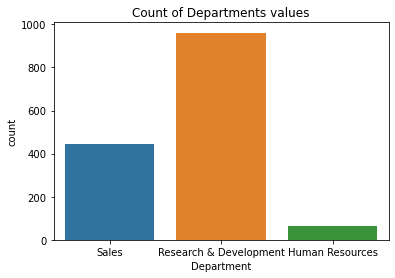

In [29]:
sns.countplot(df['Department'])
plt.title("Count of Departments values")

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Department vs Attrition')

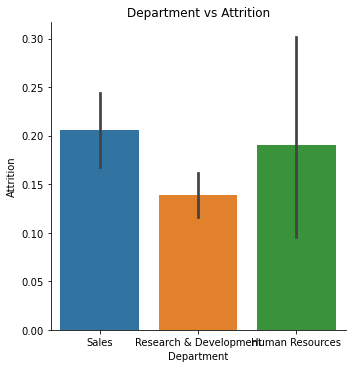

In [30]:
sns.factorplot(x = 'Department', y = 'Attrition', aspect = 1,kind = 'bar',data = df)
plt.title("Department vs Attrition")

Sales Department are having high Attrition, compare to other Departments.

Text(0.5, 1.0, 'Department vs Attention')

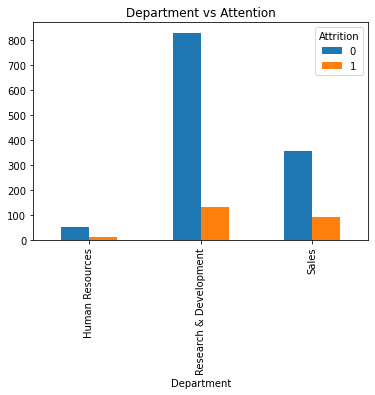

In [31]:
pd.crosstab(df['Department'],df['Attrition']).plot(kind="bar")
plt.title("Department vs Attention")

### Distance from home

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


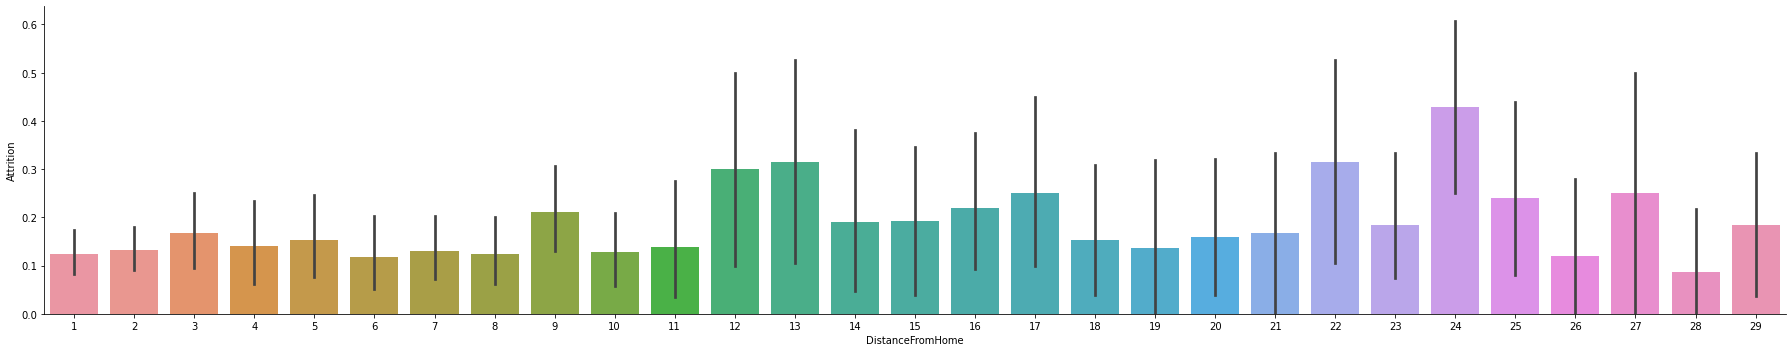

In [32]:
sns.factorplot(x = 'DistanceFromHome', y = 'Attrition', aspect = 5,kind = 'bar',data = df)

In [33]:
def bin_dist_home(distance):
    if distance <= 2:
        return "Near"
    elif distance >= 2 and distance <= 5:
        return "Far"
    else:
        return "Extremely Far"
    
df['DistanceFromHome'] = df['DistanceFromHome'].apply(bin_dist_home)

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


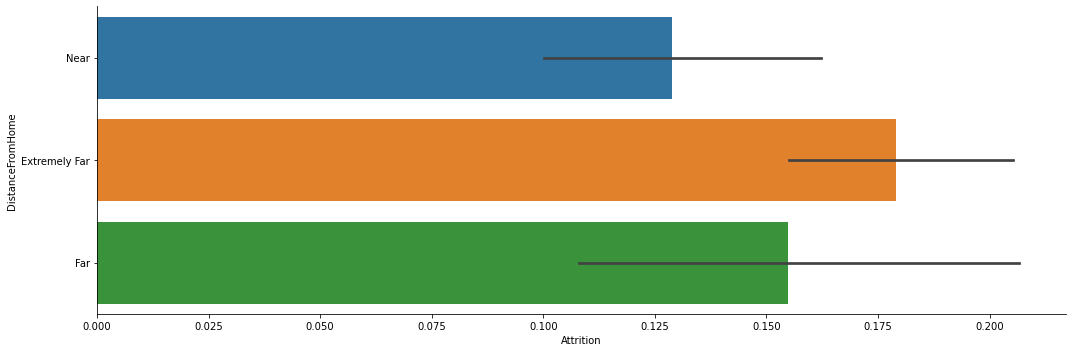

In [34]:
sns.factorplot(y = 'DistanceFromHome', x = 'Attrition', aspect = 3,kind = 'bar',data = df)

Employees who are coming from Extremely Far having high Attrition Rate

### Educational Field

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Educational Field values')

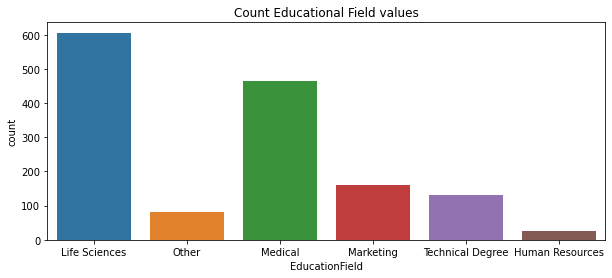

In [35]:
plt.figure(figsize=(10,4))

sns.countplot(df['EducationField'])
plt.title("Count Educational Field values")

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Education Field vs Attrition')

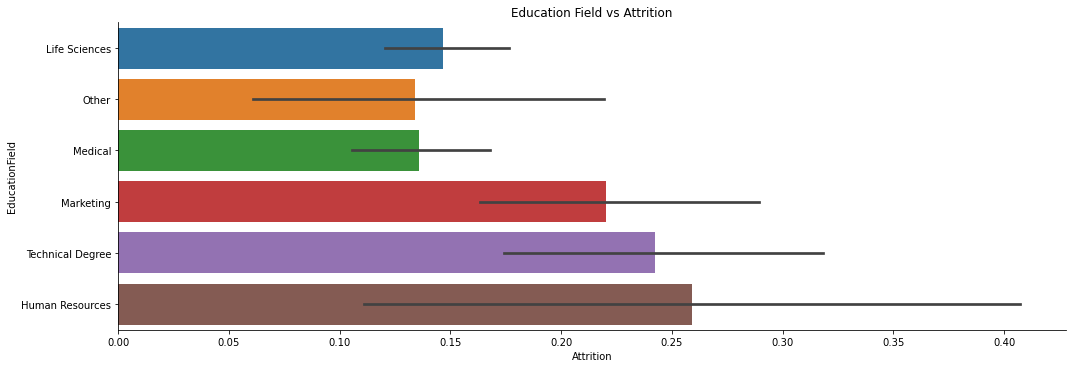

In [36]:
sns.factorplot(y = 'EducationField', x = 'Attrition', aspect = 3,kind = 'bar',data = df)
plt.title("Education Field vs Attrition")

Employee with Educational Field in Human Resource are having high chances of leaving organization.

### Job Role

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count values in Job Role')

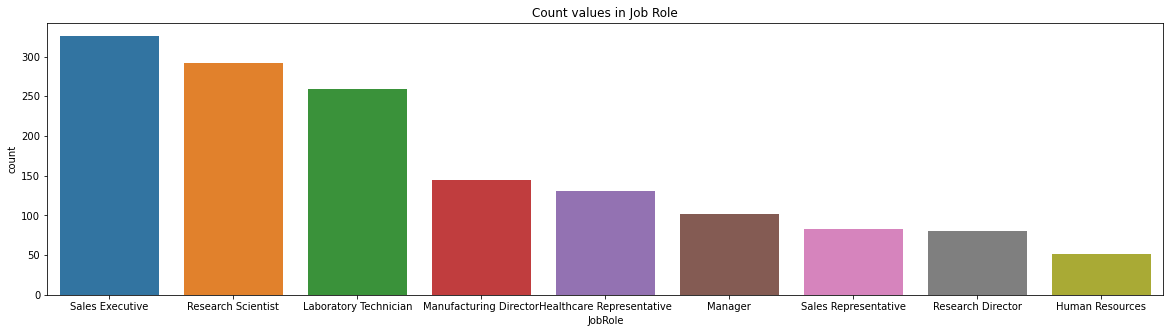

In [37]:
plt.figure(figsize=(20,5))
sns.countplot(df['JobRole'])
plt.title("Count values in Job Role")

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


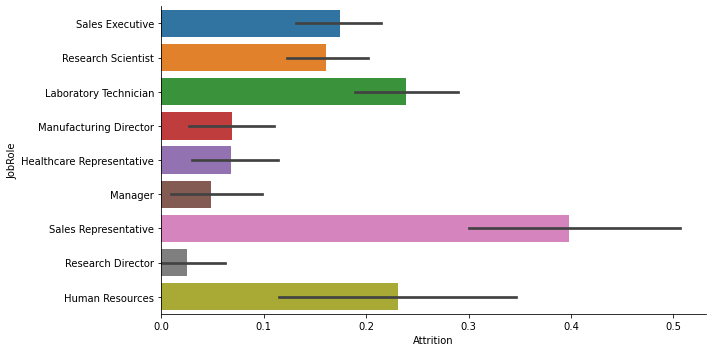

In [38]:
sns.factorplot(y = 'JobRole', x = 'Attrition', aspect = 2,kind = 'bar',data = df)

Employees who are working in Job Role, Sales Representative are having high chances of leaving Organization.

### Marital Status

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of values in Marital status')

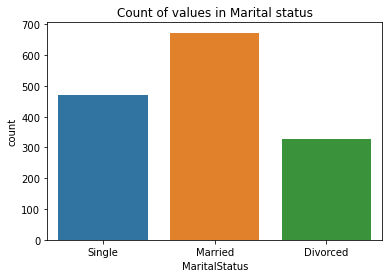

In [39]:
sns.countplot(df['MaritalStatus'])
plt.title("Count of values in Marital status")

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


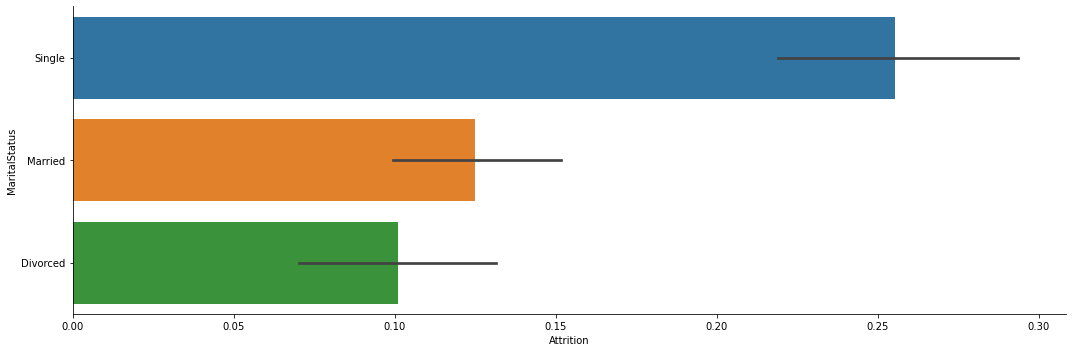

In [40]:
sns.factorplot(y = 'MaritalStatus', x = 'Attrition', aspect = 3,kind = 'bar',data = df)

Employees who are Single are having very high chances of Attrition

### Over Time

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count Values in Over Time')

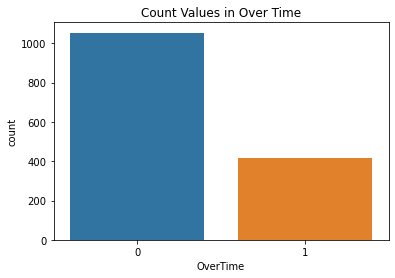

In [41]:
sns.countplot(df['OverTime'])
plt.title("Count Values in Over Time")

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


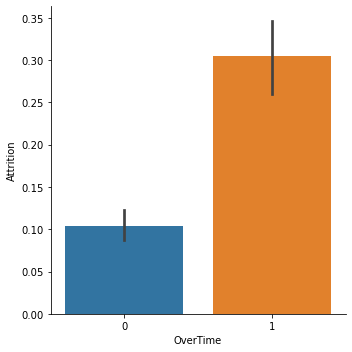

In [42]:
sns.factorplot(x = 'OverTime', y = 'Attrition', aspect = 1,kind = 'bar',data = df)

Employees who work Over Time are having high Attrition

### PercentSalaryHike

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='PercentSalaryHike', ylabel='count'>

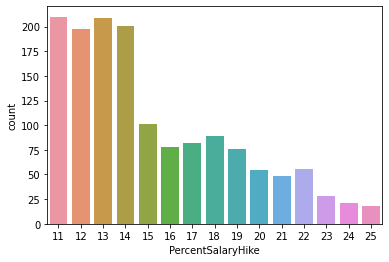

In [43]:
sns.countplot(df['PercentSalaryHike'])

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


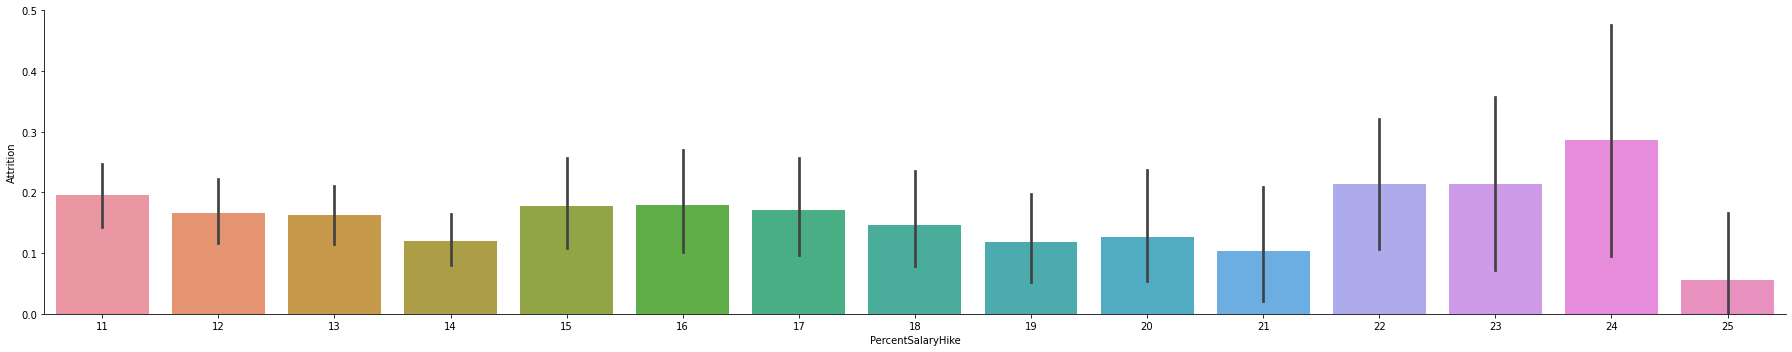

In [44]:
sns.factorplot(x = 'PercentSalaryHike', y = 'Attrition', aspect = 5,kind = 'bar',data = df)

Employees Percent Salary Hike the chances of attention looks Normal, only slight changes at 22 to 24 Percent Hike are having high attrition value. 

### Monthly Income

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MonthlyIncome'>

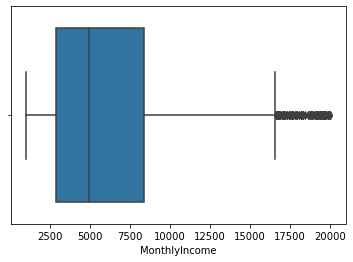

In [45]:
sns.boxplot(df['MonthlyIncome'])

In [46]:
df['MonthlyIncome'].describe()

count     1470.000000
mean      6502.931293
std       4707.956783
min       1009.000000
25%       2911.000000
50%       4919.000000
75%       8379.000000
max      19999.000000
Name: MonthlyIncome, dtype: float64

In [47]:
# Creating Bins for age 

def income_bin(x):
    if x >= 1000 and x < 3000:
        return "low"
    elif x >= 3000 and x < 5000:
        return "average"
    elif x >= 5000 and x <8000:
        return "above_avg"
    else:
        return "high"

In [48]:
df['Income_class'] = df['MonthlyIncome'].apply(income_bin)

In [49]:
df['Income_class'].value_counts()

low          395
high         381
average      354
above_avg    340
Name: Income_class, dtype: int64

C:\Users\sntu8\anaconda\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


Text(0.5, 1.0, 'Income vs Attrition')

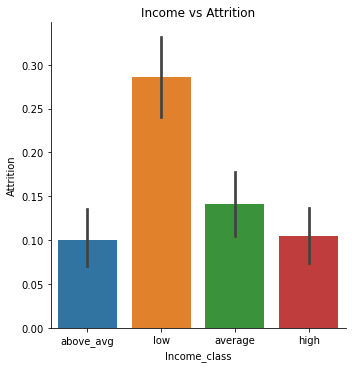

In [50]:
sns.factorplot(x = 'Income_class', y = 'Attrition', aspect = 1,kind = 'bar',data = df)
plt.title("Income vs Attrition")

Employees who are getting very Low salary high chances of leaving organization.

In [51]:
df = df.drop(['Income_class'], axis=1)

In [52]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,Gender,JobRole,MaritalStatus,MonthlyIncome,OverTime,PercentSalaryHike
0,41,1,Travel_Rarely,Sales,Near,Life Sciences,0,Sales Executive,Single,5993,1,11
1,49,0,Travel_Frequently,Research & Development,Extremely Far,Life Sciences,1,Research Scientist,Married,5130,0,23
2,37,1,Travel_Rarely,Research & Development,Near,Other,1,Laboratory Technician,Single,2090,1,15
3,33,0,Travel_Frequently,Research & Development,Far,Life Sciences,0,Research Scientist,Married,2909,1,11
4,27,0,Travel_Rarely,Research & Development,Near,Medical,1,Laboratory Technician,Married,3468,0,12


In [53]:
df.shape

(1470, 12)

In [54]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [55]:
df['BusinessTravel'].value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [56]:
# Feature Maping for Business Travel Column

df['BusinessTravel'] = df['BusinessTravel'].replace(('Travel_Rarely', 'Travel_Frequently', 'Non-Travel'),(1,2,0))

In [57]:
df['BusinessTravel'].value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

In [58]:
df['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [59]:
# One hot encoding for Department Column

df = pd.get_dummies(data=df, columns=["Department"], drop_first= True)

In [60]:
df['DistanceFromHome'].unique()

array(['Near', 'Extremely Far', 'Far'], dtype=object)

In [61]:
df['DistanceFromHome'].value_counts()

Extremely Far    838
Near             419
Far              213
Name: DistanceFromHome, dtype: int64

In [62]:
# Feature maping for Distance from Home Column

df['DistanceFromHome'] = df['DistanceFromHome'].replace(('Near', 'Extremely Far', 'Far'),(0,2,1))

In [63]:
df['DistanceFromHome'].value_counts()

2    838
0    419
1    213
Name: DistanceFromHome, dtype: int64

In [64]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [65]:
# One Hot Encoding for Educational Filed, Job Role, MaritalStatus

df = pd.get_dummies(data=df, columns=["EducationField"], drop_first= True)
df = pd.get_dummies(data=df, columns=["JobRole"], drop_first= True)
df = pd.get_dummies(data=df, columns=["MaritalStatus"], drop_first= True)

In [66]:
df.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Gender,MonthlyIncome,OverTime,PercentSalaryHike,Department_Research & Development,Department_Sales,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,0,0,5993,1,11,0,1,...,0,0,0,0,0,0,1,0,0,1
1,49,0,2,2,1,5130,0,23,1,0,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1,0,1,2090,1,15,1,0,...,0,1,0,0,0,0,0,0,0,1
3,33,0,2,1,0,2909,1,11,1,0,...,0,0,0,0,0,1,0,0,1,0
4,27,0,1,0,1,3468,0,12,1,0,...,0,1,0,0,0,0,0,0,1,0


<AxesSubplot:>

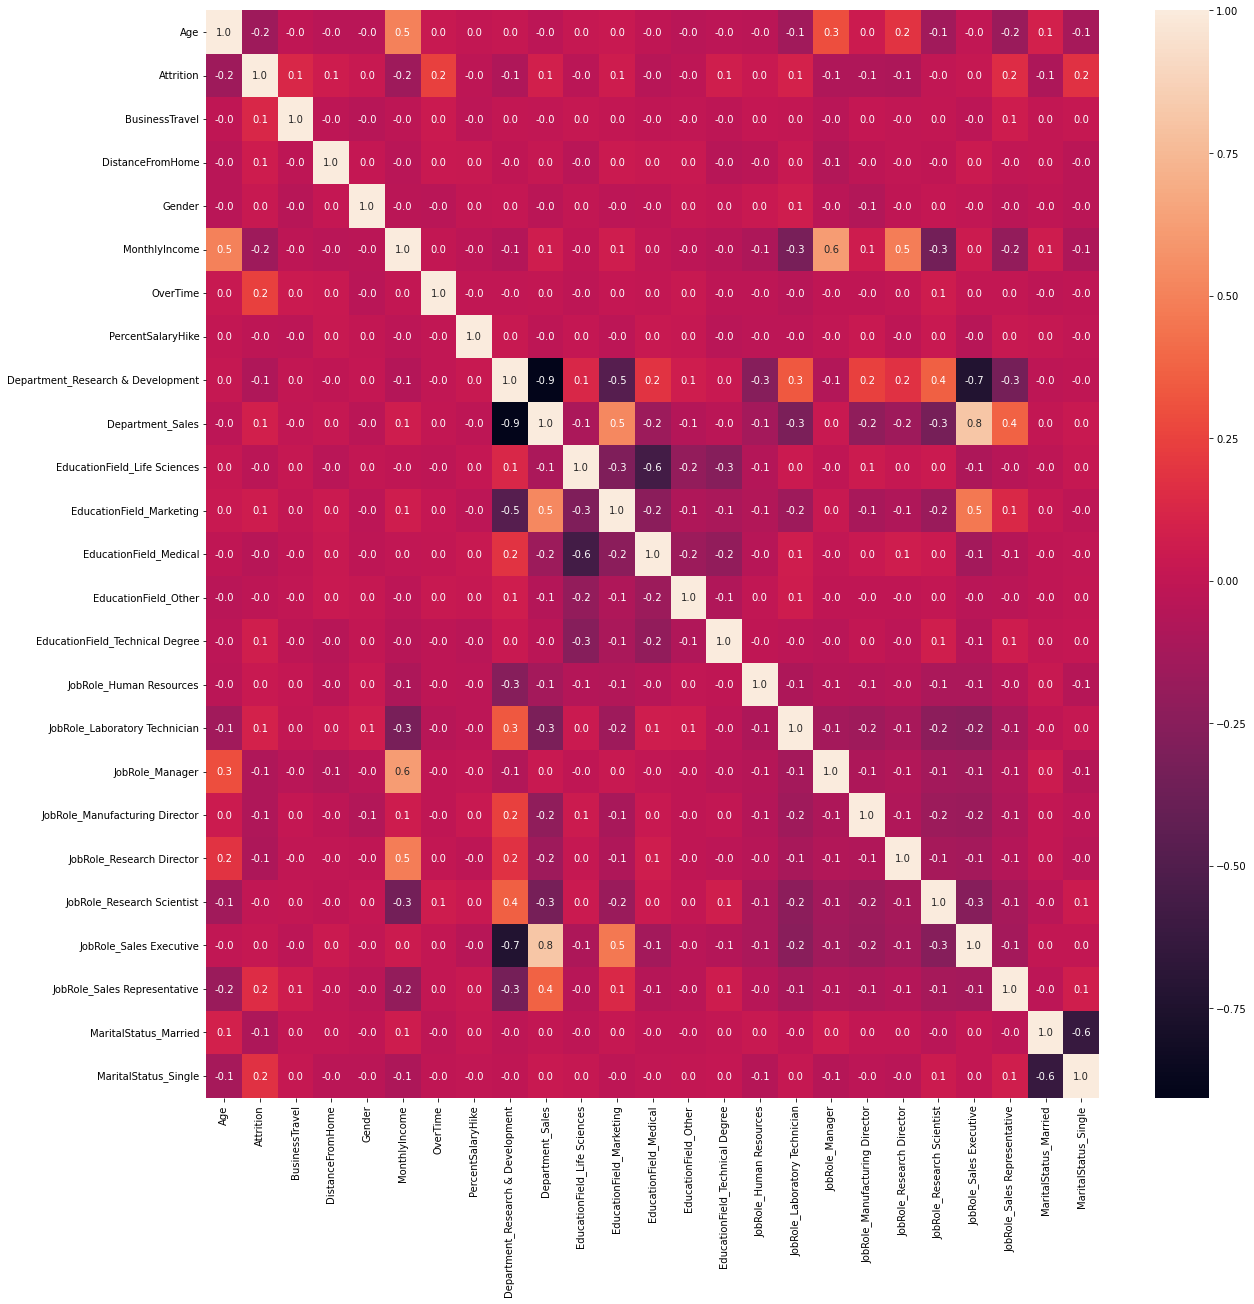

In [67]:
# Correlation of data after Pre Processed.

plt.figure(figsize=(20,20))

sns.heatmap(df.corr(), annot=True, fmt="0.1f")

In [68]:
# Saving Pre Processed Data into new CSV file.

df.to_csv("Emp_atr_Preprecessed_data.csv", index=False)

In [69]:
# Reading Data from Newely created csv file.  

data = pd.read_csv("Emp_atr_Preprecessed_data.csv")

In [70]:
data.head()

,Age,Attrition,BusinessTravel,DistanceFromHome,Gender,MonthlyIncome,OverTime,PercentSalaryHike,Department_Research & Development,Department_Sales,...,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single
0,41,1,1,0,0,5993,1,11,0,1,...,0,0,0,0,0,0,1,0,0,1
1,49,0,2,2,1,5130,0,23,1,0,...,0,0,0,0,0,1,0,0,1,0
2,37,1,1,0,1,2090,1,15,1,0,...,0,1,0,0,0,0,0,0,0,1
3,33,0,2,1,0,2909,1,11,1,0,...,0,0,0,0,0,1,0,0,1,0
4,27,0,1,0,1,3468,0,12,1,0,...,0,1,0,0,0,0,0,0,1,0


In [71]:
# Building Logistic regression model. 

import pandas as pd

df = pd.read_csv("Emp_atr_Preprecessed_data.csv")

x = df.drop("Attrition", axis=1)
y = df['Attrition']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=30)

from sklearn.linear_model import LogisticRegression
LgR = LogisticRegression(C = 0.1, random_state = 20, solver = 'liblinear')
LgR.fit(x_train, y_train)
acc = LgR.score(x_test, y_test)*100

print("Accuracy: ",acc)

from sklearn.metrics import classification_report

RgL_preds = LgR.predict(x_test)

print(classification_report(y_test,RgL_preds))

Accuracy:  85.71428571428571
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       249
           1       0.71      0.11      0.19        45

    accuracy                           0.86       294
   macro avg       0.79      0.55      0.56       294
weighted avg       0.84      0.86      0.81       294



In [72]:
# Scalling the values for better accuracy using Standardization.

import pandas as pd

df = pd.read_csv("Emp_atr_Preprecessed_data.csv")

x = df.drop("Attrition", axis=1)
y = df['Attrition']

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)


from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_std,y,test_size=0.2,random_state=4)

from sklearn.linear_model import LogisticRegression
LgR_s = LogisticRegression(C = 0.1, random_state = 20, solver = 'liblinear')
LgR_s.fit(x_train, y_train)
acc_s = LgR_s.score(x_test, y_test)*100

print("Standardized data Accuracy: ",acc_s)

from sklearn.metrics import classification_report

RgL_s_preds = LgR_s.predict(x_test)

print(classification_report(y_test,RgL_s_preds))

Standardized data Accuracy:  87.07482993197279
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       251
           1       0.73      0.19      0.30        43

    accuracy                           0.87       294
   macro avg       0.80      0.59      0.61       294
weighted avg       0.85      0.87      0.84       294



Feature importance

* These “coef’s” tell how much and in what way did each one of them contribute to predicting the target variable.

<AxesSubplot:title={'center':'Feature Importance'}>

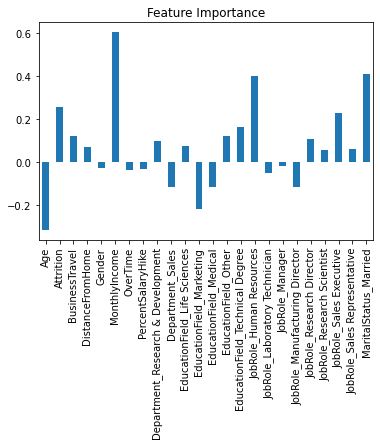

In [73]:
feature_dict=dict(zip(df.columns,list(LgR_s.coef_[0])))
feature_df=pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot(kind="bar",legend=False,title="Feature Importance")

In [74]:
y_pred = LgR.predict(x_test)

C:\Users\sntu8\anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [75]:
y_pred[:20]

array([0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1],
      dtype=int64)

In [76]:
y_test[:20]

325     0
1165    0
1153    1
1403    0
1019    0
747     0
462     0
616     0
144     0
230     0
677     0
608     1
408     0
293     1
738     0
58      0
921     0
447     0
696     0
518     0
Name: Attrition, dtype: int64